In [1]:
!pip install -U gdown

# Replace with actual folder ID
folder_id = "1OjIuEPG8CFreANvI_FqDjv-Pa52fzCb6"
!gdown --folder https://drive.google.com/drive/folders/{folder_id}


Retrieving folder contents
Retrieving folder 1MctoqeYhlBzX7YsTqe8lzaLt1SU54XSw Downsampled Models
Processing file 1l04pa8R6YUePPHky3Zuk_k1ysCkD1UpS bagging_model.pkl
Processing file 19KsB2LMJsBi_6To2WiGd6Mw9VloteDbG cart_model.pkl
Processing file 1wmonRXzX-2vbhETLuMVoLsXx9xfbYFga extra_trees_model.pkl
Processing file 1UxNfmxTKvE9bLb8XEhS0mRckP96vG6PF gradient_boosting_model.pkl
Processing file 1rwJA3fNRZC9c7MxZrqoSRDw_2J7gRA58 knn_model.pkl
Processing file 1pRHU6MKh-HKoO0bgjH7yNO9mdqNPo3Y6 logistic_model.pkl
Processing file 1CAas92Gq4bh6Mfv_xY8QT2tqdi38--ie random_forest_model.pkl
Retrieving folder 1hsBF6WTGwFwE2TauPH6YJgPUfiM9Eogd SMOTE Models
Processing file 1XA9DGEfAl7XKw2HEaiJRlxqaqIGhFnZs bagging_model.pkl
Processing file 1XOPolThq4FBQX095PVlRPyv7Qu388Y5g cart_model.pkl
Processing file 17UweyMn39BwvIa-WX_v8Cx4OJ9G3jxVD extra_trees_model.pkl
Processing file 1sGUCq5APw71T7erWEiqVLY3jYgm6_AFL gradient_boosting_model.pkl
Processing file 1f7IptNxyNmQAJrJbznKJrEPEgNTW8OXn knn_model.pkl


In [2]:
import warnings
warnings.filterwarnings('ignore')

Create the folder for keeping the pkl files. Upload the respective files to the two folders.

In [3]:
import pandas as pd
df = pd.read_csv("/content/DATA 532 Project/carsh_mapped.csv")
df

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,30,4,2,1,2.0,1,3,1,4,1,...,0,0,1,0,6,1,2,1,1,0
1,9,1,1,1,2.0,1,3,1,3,2,...,0,2,1,0,4,0,0,1,0,0
2,8,1,1,1,2.0,2,5,3,10,1,...,0,0,1,0,6,0,2,0,0,0
3,8,1,1,1,2.0,2,3,3,1,1,...,0,2,1,1,6,0,1,1,0,2
4,30,4,1,1,1.0,3,4,1,3,2,...,0,3,0,1,4,2,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56377,8,1,1,1,1.0,2,2,3,4,1,...,0,1,0,0,3,1,2,1,1,2
56378,37,1,1,1,1.0,2,3,3,2,1,...,0,0,0,0,6,2,2,0,2,0
56379,37,1,1,1,1.0,2,4,3,1,1,...,0,1,0,0,6,2,2,1,2,2
56380,37,2,3,1,2.0,1,5,1,3,1,...,0,2,1,0,1,2,2,1,2,3


In [4]:
# Define the binary mapping for CRASH_SEVERITY
# 0: Property Damage Only (severity 3)
# 1: Injury or fatal crashes (all others)
severity_mapping = {
    3: 0,  # Property Damage Only
    1: 1,  # Fatal
    2: 1,  # Injury
    4: 1,  # Suspected Serious Injury
    5: 1   # Possible Injury
}

# Apply the mapping to the CRASH_SEVERITY column
df['CRASH_SEVERITY'] = df['CRASH_SEVERITY'].map(severity_mapping)

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
0    43631
1    12751
Name: count, dtype: int64


# Downsampling

In [5]:
from sklearn.utils import resample

# Get the minimum number of rows in any class
min_class_size = df['CRASH_SEVERITY'].value_counts().min()

# Perform undersampling
balanced_df = df.groupby('CRASH_SEVERITY', group_keys=False).apply(lambda x: x.sample(min_class_size, random_state=42))

# Verify the changes
print(balanced_df['CRASH_SEVERITY'].value_counts())

balanced_df.shape


CRASH_SEVERITY
0    12751
1    12751
Name: count, dtype: int64


(25502, 27)

In [6]:
df = balanced_df.copy()

In [7]:
X = df.drop(columns=['CRASH_SEVERITY'])
y = df['CRASH_SEVERITY']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prediction 1

In [8]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,
    matthews_corrcoef, classification_report, confusion_matrix, roc_curve
)

# Set random seed
np.random.seed(42)

# Directories
model_dir1 = "/content/DATA 532 Project/Downsampled Models"
cf_save_dir = "Downsampled CF"
roc_save_dir = "Downsampled ROC"

os.makedirs(cf_save_dir, exist_ok=True)
os.makedirs(roc_save_dir, exist_ok=True)

# Store evaluation results
results = []

# Load and evaluate each saved model (Pipeline)
for filename in os.listdir(model_dir1):
    if filename.endswith("_model.pkl"):
        model_path = os.path.join(model_dir1, filename)
        model_name = filename.replace("_model.pkl", "")

        # Load pipeline
        model = joblib.load(model_path)

        # Predict using pipeline (includes internal scaling)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        class_report = classification_report(y_test, y_pred, output_dict=True)

        # Append results
        results.extend([
            {
                'Model': model_name.upper(),
                'Class': 'Class 0',
                'Precision': class_report['0']['precision'],
                'Recall': class_report['0']['recall'],
                'F1 Score': class_report['0']['f1-score'],
                'Support': class_report['0']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Class 1',
                'Precision': class_report['1']['precision'],
                'Recall': class_report['1']['recall'],
                'F1 Score': class_report['1']['f1-score'],
                'Support': class_report['1']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Overall',
                'Precision': class_report['weighted avg']['precision'],
                'Recall': class_report['weighted avg']['recall'],
                'F1 Score': class_report['weighted avg']['f1-score'],
                'Support': class_report['macro avg']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            }
        ])

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        conf_matrix_path = os.path.join(cf_save_dir, f"confusion_matrix_{model_name}.png")
        plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"Confusion Matrix saved at: {conf_matrix_path}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        roc_curve_path = os.path.join(roc_save_dir, f"roc_curve_{model_name}.png")
        plt.savefig(roc_curve_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"ROC Curve saved at: {roc_curve_path}")

# Create and display the performance dataframe
df_results = pd.DataFrame(results)



Confusion Matrix saved at: Downsampled CF/confusion_matrix_random_forest.png
ROC Curve saved at: Downsampled ROC/roc_curve_random_forest.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_extra_trees.png
ROC Curve saved at: Downsampled ROC/roc_curve_extra_trees.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_logistic.png
ROC Curve saved at: Downsampled ROC/roc_curve_logistic.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_cart.png
ROC Curve saved at: Downsampled ROC/roc_curve_cart.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_knn.png
ROC Curve saved at: Downsampled ROC/roc_curve_knn.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_bagging.png
ROC Curve saved at: Downsampled ROC/roc_curve_bagging.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_gradient_boosting.png
ROC Curve saved at: Downsampled ROC/roc_curve_gradient_boosting.png


In [9]:
df_results

,Model,Class,Precision,Recall,F1 Score,Support,ROC AUC,MCC
0,RANDOM_FOREST,Class 0,0.645656,0.594277,0.618902,2551.0,0.694492,0.268851
1,RANDOM_FOREST,Class 1,0.624046,0.673725,0.647935,2550.0,0.694492,0.268851
2,RANDOM_FOREST,Overall,0.634853,0.633993,0.633416,5101.0,0.694492,0.268851
3,EXTRA_TREES,Class 0,0.627412,0.611917,0.619567,2551.0,0.683272,0.248462
4,EXTRA_TREES,Class 1,0.621125,0.636471,0.628704,2550.0,0.683272,0.248462
5,EXTRA_TREES,Overall,0.624269,0.624191,0.624135,5101.0,0.683272,0.248462
6,LOGISTIC,Class 0,0.605568,0.656605,0.630055,2551.0,0.656184,0.229583
7,LOGISTIC,Class 1,0.624839,0.572157,0.597339,2550.0,0.656184,0.229583
8,LOGISTIC,Overall,0.615202,0.614389,0.613700,5101.0,0.656184,0.229583
9,CART,Class 0,0.635636,0.497844,0.558364,2551.0,0.654306,0.217519



=== Confusion Matrices ===


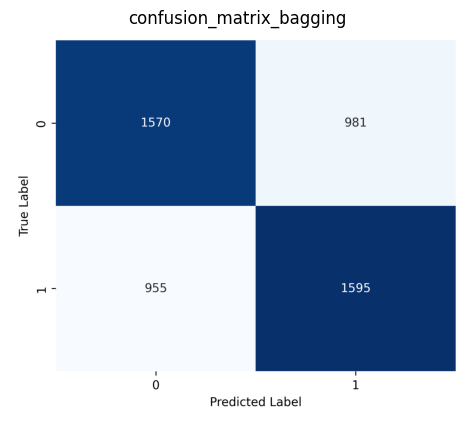

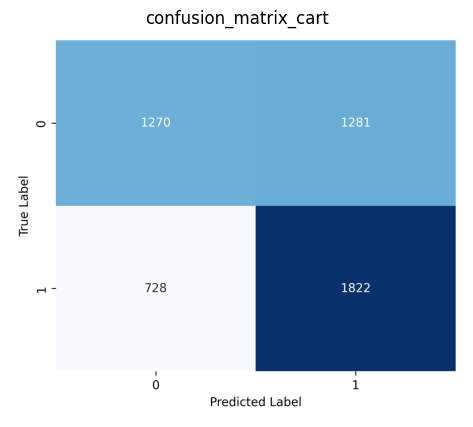

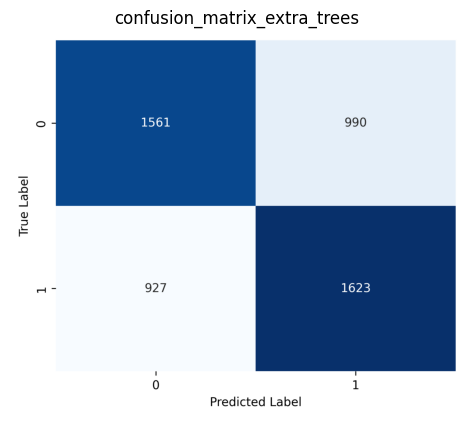

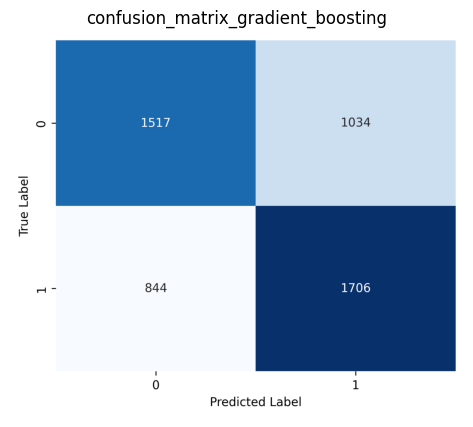

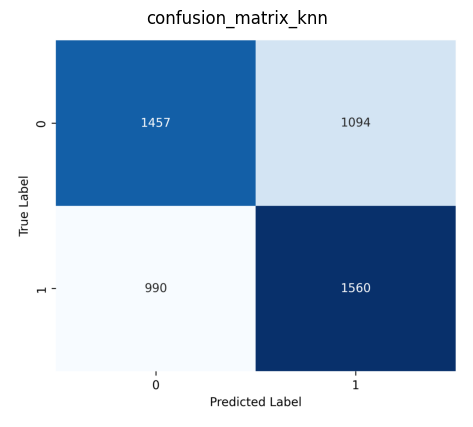

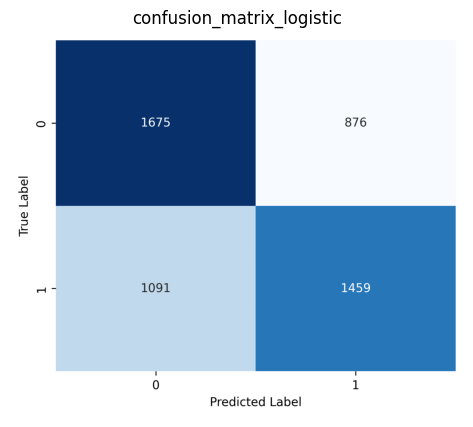

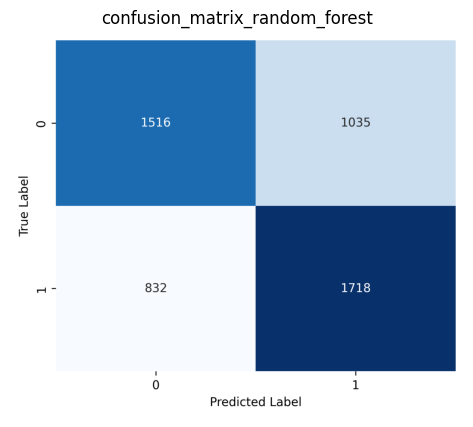


=== ROC Curves ===


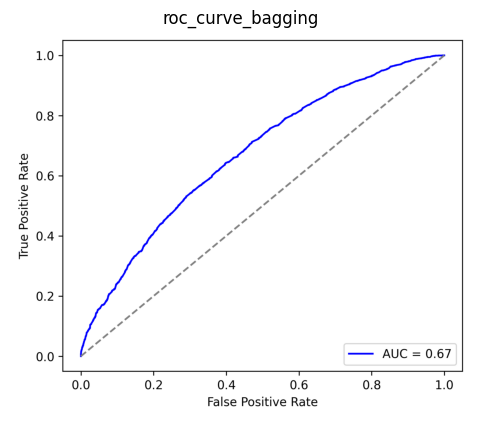

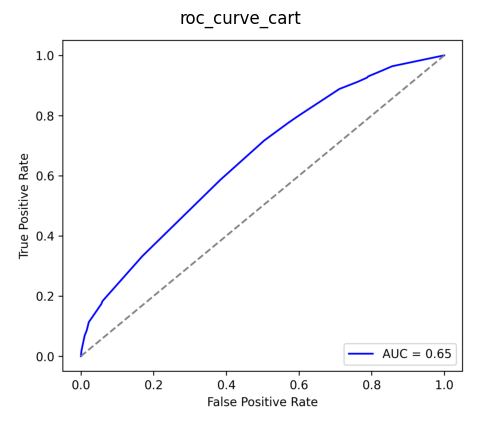

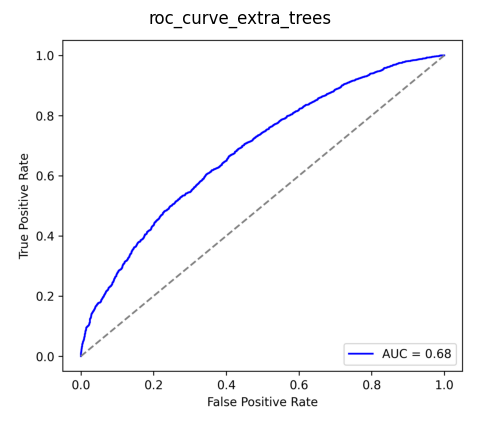

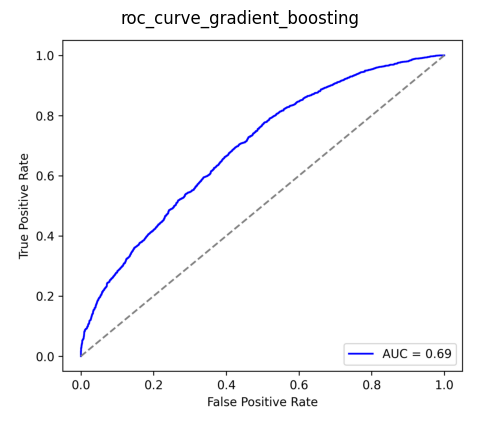

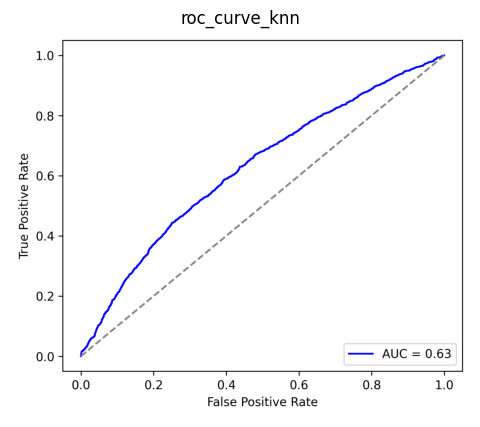

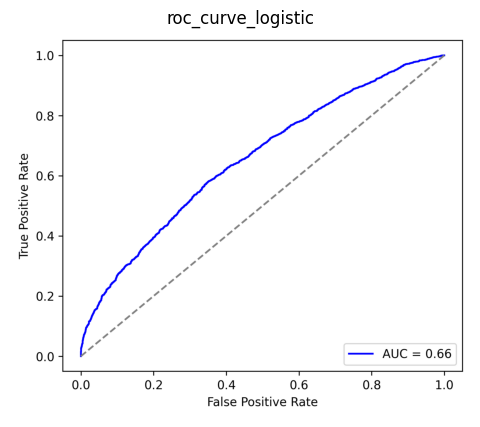

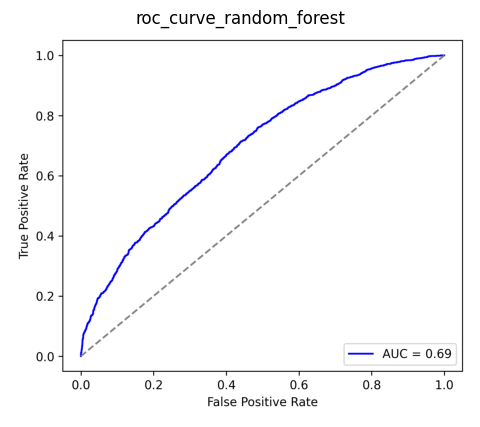

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot saved Confusion Matrices
cf_save_dir = "Downsampled CF"
roc_save_dir = "Downsampled ROC"

print("\n=== Confusion Matrices ===")
for filename in sorted(os.listdir(cf_save_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(cf_save_dir, filename)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename.replace(".png", ""))
        plt.show()

# Plot saved ROC Curves
print("\n=== ROC Curves ===")
for filename in sorted(os.listdir(roc_save_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(roc_save_dir, filename)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename.replace(".png", ""))
        plt.show()


# SMOTE

In [11]:
pip install imbalanced-learn


In [12]:
import pandas as pd
df = pd.read_csv("/content/DATA 532 Project/carsh_mapped.csv")
df

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,30,4,2,1,2.0,1,3,1,4,1,...,0,0,1,0,6,1,2,1,1,0
1,9,1,1,1,2.0,1,3,1,3,2,...,0,2,1,0,4,0,0,1,0,0
2,8,1,1,1,2.0,2,5,3,10,1,...,0,0,1,0,6,0,2,0,0,0
3,8,1,1,1,2.0,2,3,3,1,1,...,0,2,1,1,6,0,1,1,0,2
4,30,4,1,1,1.0,3,4,1,3,2,...,0,3,0,1,4,2,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56377,8,1,1,1,1.0,2,2,3,4,1,...,0,1,0,0,3,1,2,1,1,2
56378,37,1,1,1,1.0,2,3,3,2,1,...,0,0,0,0,6,2,2,0,2,0
56379,37,1,1,1,1.0,2,4,3,1,1,...,0,1,0,0,6,2,2,1,2,2
56380,37,2,3,1,2.0,1,5,1,3,1,...,0,2,1,0,1,2,2,1,2,3


In [13]:
# Define the binary mapping for CRASH_SEVERITY
# 0: Property Damage Only (severity 3)
# 1: Injury or fatal crashes (all others)
severity_mapping = {
    3: 0,  # Property Damage Only
    1: 1,  # Fatal
    2: 1,  # Injury
    4: 1,  # Suspected Serious Injury
    5: 1   # Possible Injury
}

# Apply the mapping to the CRASH_SEVERITY column
df['CRASH_SEVERITY'] = df['CRASH_SEVERITY'].map(severity_mapping)

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
0    43631
1    12751
Name: count, dtype: int64


In [14]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataset and 'CRASH_SEVERITY' is the target variable
X = df.drop(columns=['CRASH_SEVERITY'])  # Features
y = df['CRASH_SEVERITY']  # Target variable

# Splitting before oversampling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame for better interpretability
balanced_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
balanced_df['CRASH_SEVERITY'] = y_train_resampled

# Verify the new class distribution
print(balanced_df['CRASH_SEVERITY'].value_counts())

# Check the shape of the balanced dataset
balanced_df.shape


CRASH_SEVERITY
1    34904
0    34904
Name: count, dtype: int64


(69808, 27)

In [15]:
df = balanced_df.copy()

In [16]:
# Assuming 'df' is your dataset and 'CRASH_SEVERITY' is the target variable
X = df.drop(columns=['CRASH_SEVERITY'])  # Features
y = df['CRASH_SEVERITY']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prediction 2

In [18]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,
    matthews_corrcoef, classification_report, confusion_matrix, roc_curve
)

# Set random seed
np.random.seed(42)

# Directories
model_dir1 = "/content/DATA 532 Project/SMOTE Models"
cf_save_dir = "SMOTE CF"
roc_save_dir = "SMOTE ROC"

os.makedirs(cf_save_dir, exist_ok=True)
os.makedirs(roc_save_dir, exist_ok=True)

# Store evaluation results
results = []

# Load and evaluate each saved model (Pipeline)
for filename in os.listdir(model_dir1):
    if filename.endswith("_model.pkl"):
        model_path = os.path.join(model_dir1, filename)
        model_name = filename.replace("_model.pkl", "")

        # Load pipeline
        model = joblib.load(model_path)

        # Predict using pipeline (includes internal scaling)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        class_report = classification_report(y_test, y_pred, output_dict=True)

        # Append results
        results.extend([
            {
                'Model': model_name.upper(),
                'Class': 'Class 0',
                'Precision': class_report['0']['precision'],
                'Recall': class_report['0']['recall'],
                'F1 Score': class_report['0']['f1-score'],
                'Support': class_report['0']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Class 1',
                'Precision': class_report['1']['precision'],
                'Recall': class_report['1']['recall'],
                'F1 Score': class_report['1']['f1-score'],
                'Support': class_report['1']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Overall',
                'Precision': class_report['weighted avg']['precision'],
                'Recall': class_report['weighted avg']['recall'],
                'F1 Score': class_report['weighted avg']['f1-score'],
                'Support': class_report['macro avg']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            }
        ])

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        conf_matrix_path = os.path.join(cf_save_dir, f"confusion_matrix_{model_name}.png")
        plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"Confusion Matrix saved at: {conf_matrix_path}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        roc_curve_path = os.path.join(roc_save_dir, f"roc_curve_{model_name}.png")
        plt.savefig(roc_curve_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"ROC Curve saved at: {roc_curve_path}")

# Create and display the performance dataframe
df_results = pd.DataFrame(results)



Confusion Matrix saved at: SMOTE CF/confusion_matrix_random_forest.png
ROC Curve saved at: SMOTE ROC/roc_curve_random_forest.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_extra_trees.png
ROC Curve saved at: SMOTE ROC/roc_curve_extra_trees.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_logistic.png
ROC Curve saved at: SMOTE ROC/roc_curve_logistic.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_cart.png
ROC Curve saved at: SMOTE ROC/roc_curve_cart.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_knn.png
ROC Curve saved at: SMOTE ROC/roc_curve_knn.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_bagging.png
ROC Curve saved at: SMOTE ROC/roc_curve_bagging.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_gradient_boosting.png
ROC Curve saved at: SMOTE ROC/roc_curve_gradient_boosting.png


In [19]:
df_results

,Model,Class,Precision,Recall,F1 Score,Support,ROC AUC,MCC
0,RANDOM_FOREST,Class 0,0.798846,0.812921,0.805822,6981.0,0.884770,0.608317
1,RANDOM_FOREST,Class 1,0.809565,0.795302,0.802370,6981.0,0.884770,0.608317
2,RANDOM_FOREST,Overall,0.804206,0.804111,0.804096,13962.0,0.884770,0.608317
3,EXTRA_TREES,Class 0,0.805031,0.793153,0.799048,6981.0,0.878777,0.601125
4,EXTRA_TREES,Class 1,0.796160,0.807907,0.801991,6981.0,0.878777,0.601125
5,EXTRA_TREES,Overall,0.800595,0.800530,0.800519,13962.0,0.878777,0.601125
6,LOGISTIC,Class 0,0.644454,0.623406,0.633756,6981.0,0.690239,0.279622
7,LOGISTIC,Class 1,0.635317,0.656066,0.645525,6981.0,0.690239,0.279622
8,LOGISTIC,Overall,0.639886,0.639736,0.639640,13962.0,0.690239,0.279622
9,CART,Class 0,0.707928,0.615241,0.658338,6981.0,0.752360,0.364548


# Stacked Prediction

In [20]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, f1_score, roc_auc_score,
    matthews_corrcoef, roc_curve
)

# === Create output directories ===
cf_dir = "SMOTE CF"
roc_dir = "SMOTE ROC"
os.makedirs(cf_dir, exist_ok=True)
os.makedirs(roc_dir, exist_ok=True)

# === Load best stacking model ===
with open("/content/DATA 532 Project/best_stacking_model.pkl", "rb") as f:
    stacking_model = pickle.load(f)

base_models = stacking_model['base_models']
meta_model = stacking_model['meta_model']

# === Generate meta features using pipeline-based base models ===
meta_features = np.column_stack([
    model.predict_proba(X_test)[:, 1] for model in base_models.values()
])

# === Predict with meta model ===
y_pred = meta_model.predict(meta_features)
y_prob = meta_model.predict_proba(meta_features)[:, 1]

# === Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)
report = classification_report(y_test, y_pred)

# === Print Results ===
print("=== Classification Report ===")
print(report)
print(f"Accuracy     : {accuracy:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"MCC          : {mcc:.4f}")

# === Confusion Matrix Plot ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
cf_path = os.path.join(cf_dir, "confusion_matrix_best_model.png")
plt.savefig(cf_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ Confusion Matrix saved to: {cf_path}")

# === ROC Curve Plot ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
roc_path = os.path.join(roc_dir, "roc_curve_best_model.png")
plt.savefig(roc_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ ROC Curve saved to: {roc_path}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      6981
           1       0.85      0.82      0.83      6981

    accuracy                           0.84     13962
   macro avg       0.84      0.84      0.83     13962
weighted avg       0.84      0.84      0.83     13962

Accuracy     : 0.8351
F1 Score     : 0.8320
ROC AUC      : 0.9097
MCC          : 0.6706
✅ Confusion Matrix saved to: SMOTE CF/confusion_matrix_best_model.png
✅ ROC Curve saved to: SMOTE ROC/roc_curve_best_model.png



=== Confusion Matrices ===


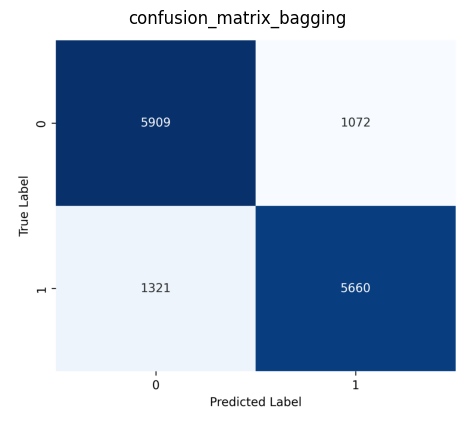

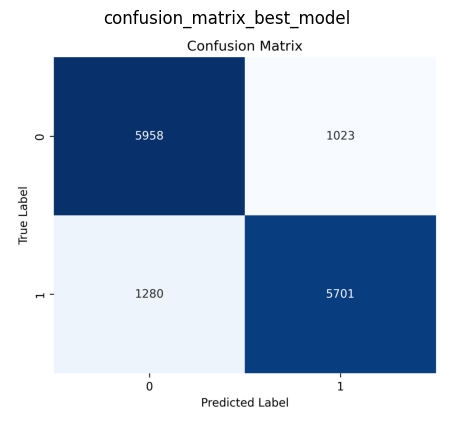

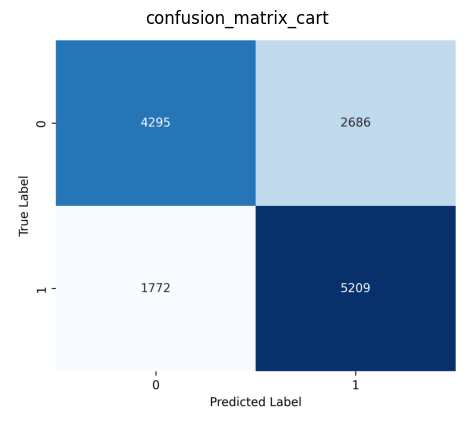

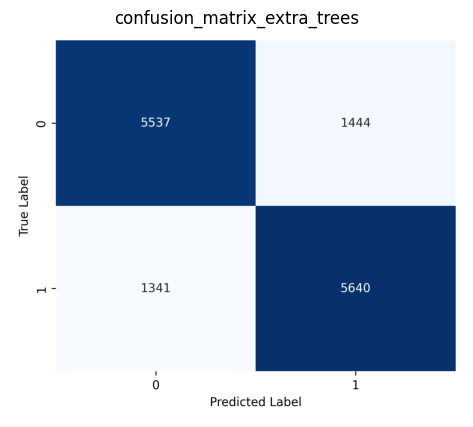

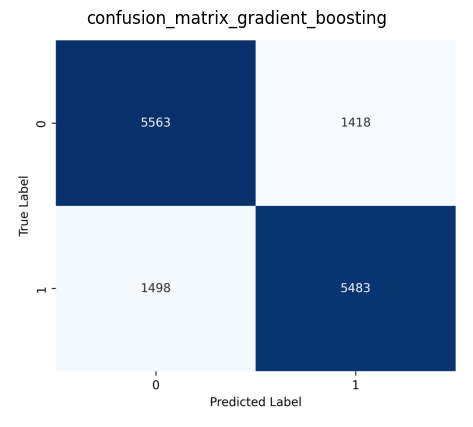

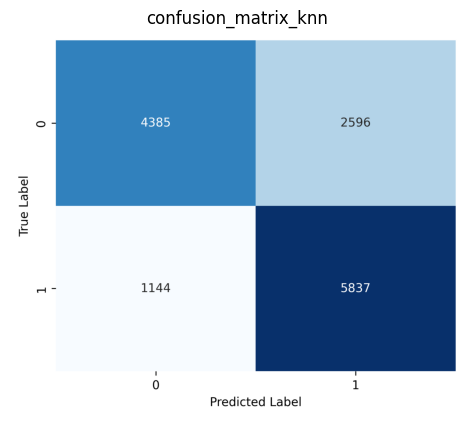

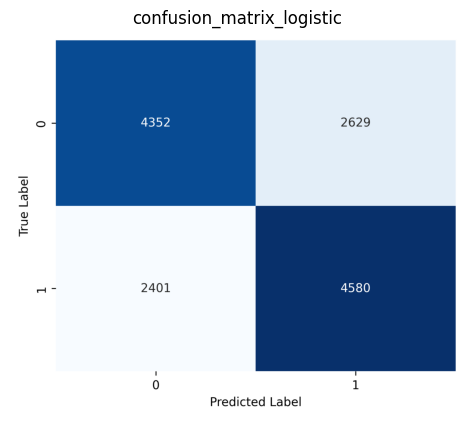

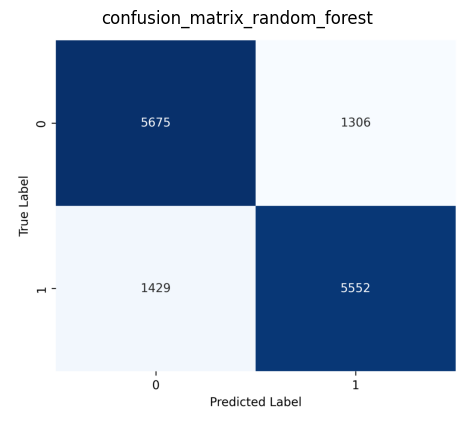


=== ROC Curves ===


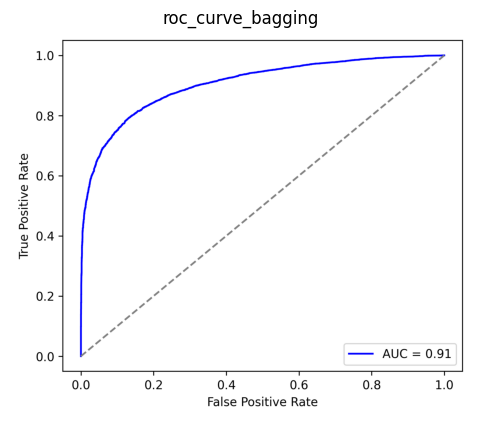

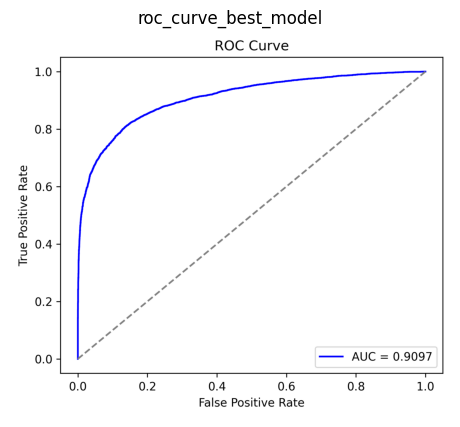

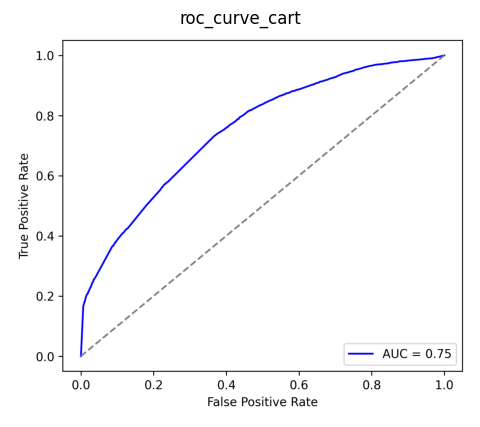

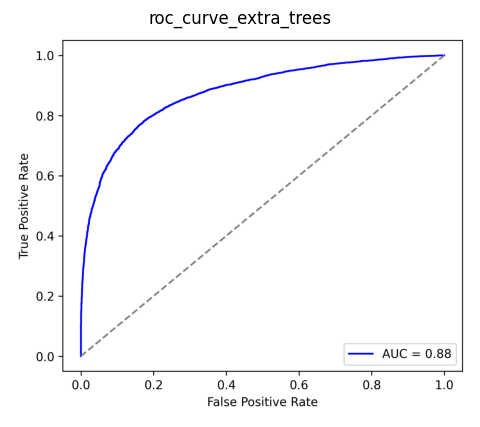

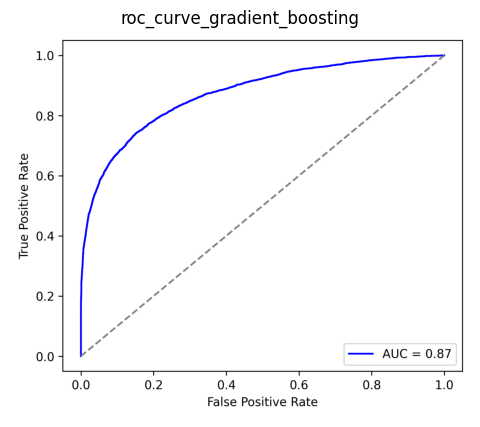

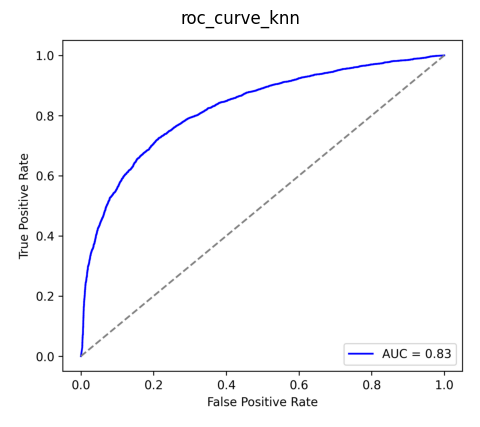

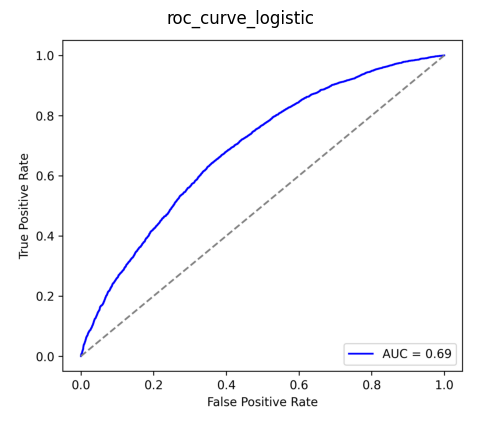

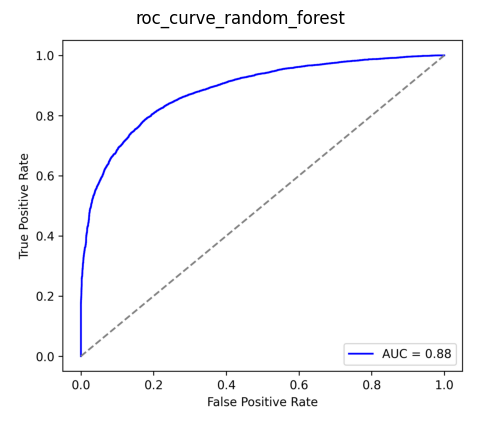

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot saved Confusion Matrices
cf_save_dir = "SMOTE CF"
roc_save_dir = "SMOTE ROC"

print("\n=== Confusion Matrices ===")
for filename in sorted(os.listdir(cf_save_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(cf_save_dir, filename)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename.replace(".png", ""))
        plt.show()

# Plot saved ROC Curves
print("\n=== ROC Curves ===")
for filename in sorted(os.listdir(roc_save_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(roc_save_dir, filename)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename.replace(".png", ""))
        plt.show()


# SHAP Analysis

In [22]:
import joblib

# Load your trained BaggingClassifier model
model = joblib.load("/content/DATA 532 Project/SMOTE Models/bagging_model.pkl")

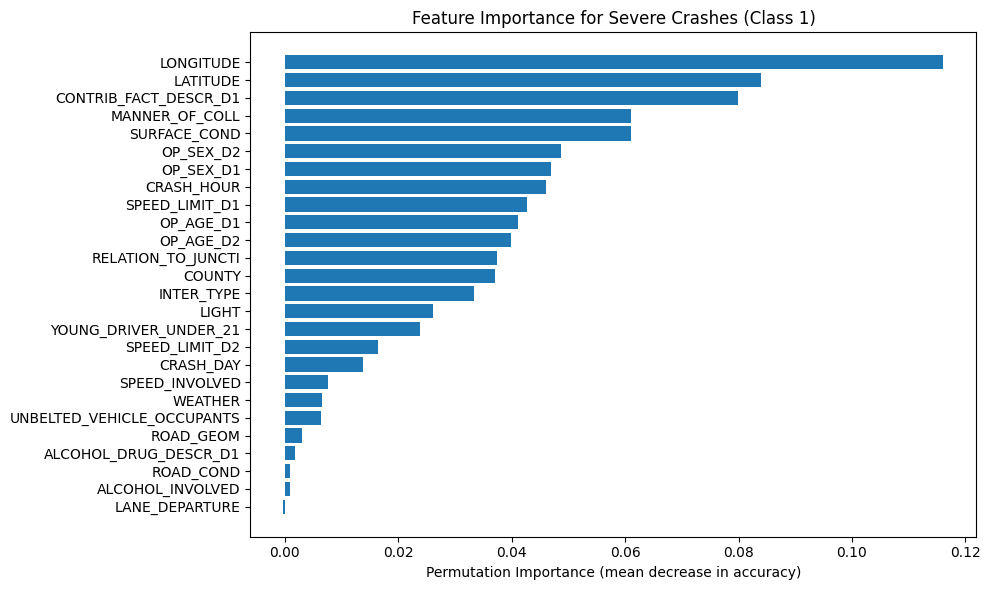

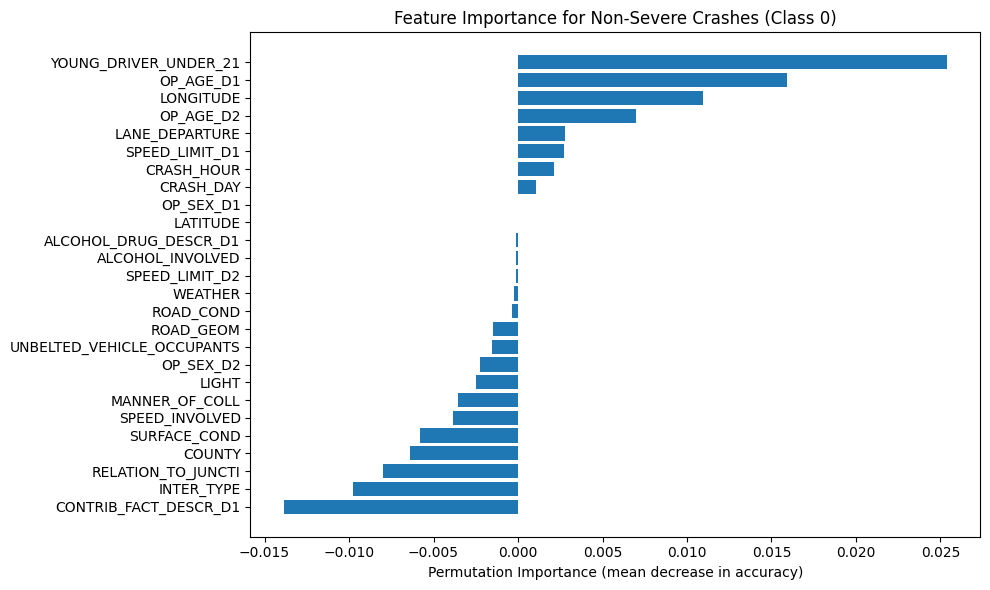

In [23]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Filter X_test and y_test for severe crashes
X_test_severe = X_test[y_test == 1]
y_test_severe = y_test[y_test == 1]

# Filter X_test and y_test for non-severe crashes
X_test_non_severe = X_test[y_test == 0]
y_test_non_severe = y_test[y_test == 0]

# Permutation importance for severe crashes
perm_severe = permutation_importance(model, X_test_severe, y_test_severe, n_repeats=30, random_state=42, n_jobs=-1)
perm_severe_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_severe.importances_mean
}).sort_values(by='Importance', ascending=False)

# Permutation importance for non-severe crashes
perm_non_severe = permutation_importance(model, X_test_non_severe, y_test_non_severe, n_repeats=30, random_state=42, n_jobs=-1)
perm_non_severe_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_non_severe.importances_mean
}).sort_values(by='Importance', ascending=False)

# --- Plot for severe crashes ---
plt.figure(figsize=(10, 6))
plt.barh(perm_severe_df['Feature'], perm_severe_df['Importance'])
plt.xlabel('Permutation Importance (mean decrease in accuracy)')
plt.title('Feature Importance for Severe Crashes (Class 1)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Plot for non-severe crashes ---
plt.figure(figsize=(10, 6))
plt.barh(perm_non_severe_df['Feature'], perm_non_severe_df['Importance'])
plt.xlabel('Permutation Importance (mean decrease in accuracy)')
plt.title('Feature Importance for Non-Severe Crashes (Class 0)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
